# Machine Learning 2

Dataset from Kaggle: **"US Accidents (2016-2021)"** by *Sobhan Moosavi*\
Source: https://www.kaggle.com/sobhanmoosavi/us-accidents \
Description of data available at https://smoosavi.org/datasets/us_accidents.

---

We have previously tried out using upsampled data to build our machine learning model for ```SEVERITY``` prediction. Now, we do not **upsample** the data, instead we use two models from ```imblearn```: ```BalancedBaggingClassifier``` & ```BalancedRandomForestClassifier```, to perform our prediction.
    
We will use the **ohe-ed** data from the previous ipynb file, which categorical variables are encoded as **one-hot numeric arrays**.

Imbalanced-learn (imported as ```imblearn```) is an open source, MIT-licensed library relying on scikit-learn (imported as ```sklearn```) and provides tools when dealing with classification with imbalanced classes.
Link to learn more about ```imblearn```: https://imbalanced-learn.org/stable/

---

The two models mentioned above are from ```imblearn``` ```ensemble``` library.

```Ensemble``` learning gives credence to the idea of the **“wisdom of crowds”**, which suggests that the decision-making of a larger group of people is typically better than that of an individual expert. Similarly, ```ensemble``` learning refers to a group (or ```ensemble```) of base learners, or models, which work collectively to achieve a better final prediction. A single model, also known as a *base or weak learner*, may not perform well individually due to *high variance or high bias*. However, when weak learners are aggregated, they can form a strong learner, as their combination *reduces bias or variance, yielding better model performance*.


## Data Preparation

We first import the essential Python libraries.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set

<function seaborn.rcmod.set(*args, **kwargs)>

Import the file **us_16_acd_ohe.csv** which contains the ohe-ed data, but not upsampled.

In [2]:
us_16_acd_ohe=pd.read_csv('us_16_acd_ohe.csv')
us_16_acd_ohe.head()

,TEMPERATURE,HUMIDITY,PRESSURE,WIND_SPEED,SIDE_L,SIDE_R,STATE_Alabama,STATE_Arizona,STATE_Arkansas,STATE_California,...,CROSSING_False,CROSSING_True,JUNCTION_False,JUNCTION_True,TRAFFIC_SIGNAL_False,TRAFFIC_SIGNAL_True,DAY_NIGHT_Day,DAY_NIGHT_Night,DAY_NIGHT_NotDefined,SEVERITY
0,36.9,91.0,29.68,7.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,2
1,36.0,97.0,29.70,7.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,2
2,39.0,55.0,29.65,7.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,2
3,37.0,93.0,29.69,10.4,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3
4,35.6,100.0,29.66,8.1,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,2


A glance at the info of our data.

In [3]:
us_16_acd_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114829 entries, 0 to 114828
Data columns (total 80 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   TEMPERATURE                      114829 non-null  float64
 1   HUMIDITY                         114829 non-null  float64
 2   PRESSURE                         114829 non-null  float64
 3   WIND_SPEED                       114829 non-null  float64
 4   SIDE_L                           114829 non-null  float64
 5   SIDE_R                           114829 non-null  float64
 6   STATE_Alabama                    114829 non-null  float64
 7   STATE_Arizona                    114829 non-null  float64
 8   STATE_Arkansas                   114829 non-null  float64
 9   STATE_California                 114829 non-null  float64
 10  STATE_Colorado                   114829 non-null  float64
 11  STATE_Connecticut                114829 non-null  float64
 12  ST

We change the data type of ```SEVERITY``` column from ```int64``` to ```category``` as required.

In [4]:
us_16_acd_ohe["SEVERITY"] = us_16_acd_ohe["SEVERITY"].astype("category")

## BalancedBaggingClassifier

A ```Bagging``` classifier with additional **balancing**. The implementation of ```Bagging``` is similar to the scikit-learn implementation. It includes an additional step to **balance the training set** at fit time using a given sampler.\
More details at: https://imbalanced-learn.org/stable/references/generated/imblearn.ensemble.BalancedBaggingClassifier.html

---

What is ```Bagging```?

```Bagging```, also known as **bootstrap aggregation**, is the ```ensemble``` learning method that is commonly used to *reduce variance within a noisy dataset*. In ```bagging```, a random sample of data in a training set is selected with replacement—meaning that the individual data points can be chosen more than once. After several data samples are generated, these *weak models are then trained independently*, and depending on the type of task—regression or classification, for example—the average or majority of those predictions yield a **more accurate estimate**.\
More details at: https://www.ibm.com/cloud/learn/bagging#:~:text=Bagging%2C%20also%20known%20as%20bootstrap,be%20chosen%20more%20than%20once.

Import the essential libraries.

> train_test_split: Split arrays or matrices into random train and test subsets.\
> DecisionTreeClassifier: A decision tree classifier.\
> plot_tree: Plot a decision tree.\
> confusion_matrix: Compute confusion matrix to evaluate the accuracy of a classification.\
> BalancedBaggingClassifier: A Bagging classifier with additional balancing.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from imblearn.ensemble import BalancedBaggingClassifier

In [6]:
y=pd.DataFrame(us_16_acd_ohe["SEVERITY"])
X=pd.DataFrame(us_16_acd_ohe.drop("SEVERITY", axis=1))

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2) #split the data into train:test=8:2

Create a ```BalancedBaggingClassifier``` object with the following parameters:
- base_estimator: DecisionTreeClassifier
- sampling_strategy: auto (equivalent to 'not minority')
- replacement: False
- random_state: None
- Leaving other parameters as default

Fit the model using the **train** data.

In [7]:
bbc=BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                             sampling_strategy='auto',
                             replacement=False,
                             random_state=None)

bbc.fit(X_train, y_train.SEVERITY.ravel())

BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier())

Predict the **train** data using the model we trained just now. Plot the **heatmap of confusion matrix**.

| Confusion Matrix  |       |        |        |      
| :---              | :---: | :----: | :----: |         
| Actual 2   |  True 2   |  False 2  |   False 2   |             
| Actual 3   |  False 3  |  True 3   |   False 3   |  
| Actual 4   |  False 4  |  False 4  |   True 4    |    
|                   | Predicted 2 | Predicted 3 | Predicted 4 |  


<AxesSubplot:>

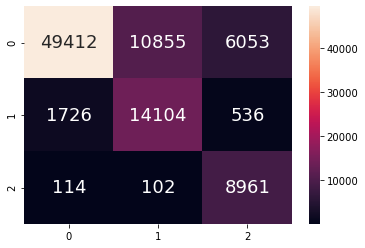

In [8]:
y_train_pred=bbc.predict(X_train)

sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [9]:
print("Train Data")
print("Accuracy  :\t", bbc.score(X_train, y_train))
print()

cmTrain = confusion_matrix(y_train, y_train_pred)
true_2=cmTrain[0][0]
true_3=cmTrain[1][1]
true_4=cmTrain[2][2]
false_2=cmTrain[0][1]+cmTrain[0][2]
false_3=cmTrain[1][0]+cmTrain[1][2]
false_4=cmTrain[2][0]+cmTrain[2][1]

print("True 2 Train :\t", (true_2/(true_2 + false_2)))
print("False 2 Train :\t", (false_2/(true_2 + false_2)))
print()

print("True 3 Train :\t", (true_3/(true_3 + false_3)))
print("False 3 Train :\t", (false_3/(true_3 + false_3)))
print()

print("True 4 Train :\t", (true_4/(true_4 + false_4)))
print("False 4 Train :\t", (false_4/(true_4 + false_4)))
print()

Train Data
Accuracy  :	 0.7889683550504556

True 2 Train :	 0.7450542822677925
False 2 Train :	 0.2549457177322075

True 3 Train :	 0.8617866308199926
False 3 Train :	 0.13821336918000734

True 4 Train :	 0.9764628963713632
False 4 Train :	 0.02353710362863681



The accuracy of the model improved quite significantly from the previous ```scikitlearn``` ```DecisionTreeClassifier``` models used. For the individual categories, the true rates are also satisfying compared to the previous models. By letting the model to balance the imbalanced data we have, the results are better as we have reduced the variance and bias of the data.

Predict the **test** data using the model we trained just now. Plot the **heatmap of confusion matrix**.

| Confusion Matrix  |       |        |        |      
| :---              | :---: | :----: | :----: |         
| Actual 2   |  True 2   |  False 2  |   False 2   |             
| Actual 3   |  False 3  |  True 3   |   False 3   |  
| Actual 4   |  False 4  |  False 4  |   True 4    |    
|                   | Predicted 2 | Predicted 3 | Predicted 4 |  


<AxesSubplot:>

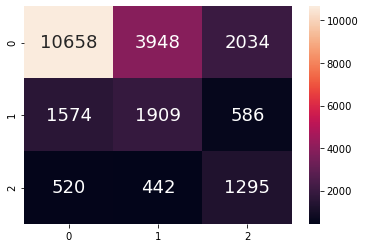

In [10]:
y_test_pred = bbc.predict(X_test)

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [11]:
print("Test Data")
print("Accuracy  :\t", bbc.score(X_test, y_test))
print()

cmTest = confusion_matrix(y_test, y_test_pred)
true_2_test=cmTest[0][0]
true_3_test=cmTest[1][1]
true_4_test=cmTest[2][2]
false_2_test=cmTest[0][1]+cmTest[0][2]
false_3_test=cmTest[1][0]+cmTest[1][2]
false_4_test=cmTest[2][0]+cmTest[2][1]

print("True 2 Test :\t", (true_2_test/(true_2_test + false_2_test)))
print("False 2 Test :\t", (false_2_test/(true_2_test + false_2_test)))
print()

print("True 3 Test :\t", (true_3_test/(true_3_test + false_3_test)))
print("False 3 Test :\t", (false_3_test/(true_3_test + false_3_test)))
print()

print("True 4 Test :\t", (true_4_test/(true_4_test + false_4_test)))
print("False 4 Test :\t", (false_4_test/(true_4_test + false_4_test)))
print()

Test Data
Accuracy  :	 0.6035879125664025

True 2 Test :	 0.6405048076923077
False 2 Test :	 0.35949519230769234

True 3 Test :	 0.46915704104202505
False 3 Test :	 0.530842958957975

True 4 Test :	 0.5737704918032787
False 4 Test :	 0.4262295081967213



The accuracy of the prediction for test data improved a little compared to the previous models. However, it did not give as good result as the train data did. This is probably due to the larger data size in train data making the bagging process more efficient in reducing the variance and bias of the data.

## BalancedRandomForestClassifier

A balanced random forest classifier. A balanced random forest randomly under-samples each bootstrap sample to balance it. Similar to ```RandomForestClassifier``` from scikit-learn but for imbalanced data.\
More details at: https://imbalanced-learn.org/stable/references/generated/imblearn.ensemble.BalancedRandomForestClassifier.html


Import the essential library.

> BalancedRandomForestClassifier: A balanced random forest classifier.

Other libraries are already imported above.

In [12]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [13]:
y=pd.DataFrame(us_16_acd_ohe["SEVERITY"])
X=pd.DataFrame(us_16_acd_ohe.drop("SEVERITY", axis=1))

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2) #split the data into train:test=8:2

Create a ```BalancedRandomForestClassifier``` object with the following parameters:
- n_estimators: 100
- criterion=gini
- max_depth=None (nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples - 2 by default)
- sampling_strategy=auto
- random_state: None (the random number generator is the RandomState instance used by np.random)
- Leaving other parameters as default

Fit the model using the **train** data.

In [14]:
brfc=BalancedRandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None,
                                    sampling_strategy='auto', random_state=None)

brfc.fit(X_train, y_train.SEVERITY.ravel())

BalancedRandomForestClassifier()

Predict the **train** data using the model we trained just now. Plot the **heatmap of confusion matrix**.

| Confusion Matrix  |       |        |        |      
| :---              | :---: | :----: | :----: |         
| Actual 2   |  True 2   |  False 2  |   False 2   |             
| Actual 3   |  False 3  |  True 3   |   False 3   |  
| Actual 4   |  False 4  |  False 4  |   True 4    |    
|                   | Predicted 2 | Predicted 3 | Predicted 4 |  

<AxesSubplot:>

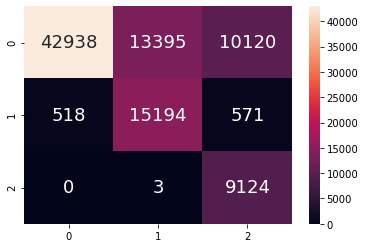

In [15]:
y_train_pred=brfc.predict(X_train)

sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [16]:
print("Train Data")
print("Accuracy  :\t", brfc.score(X_train, y_train))
print()

cmTrain = confusion_matrix(y_train, y_train_pred)
true_2=cmTrain[0][0]
true_3=cmTrain[1][1]
true_4=cmTrain[2][2]
false_2=cmTrain[0][1]+cmTrain[0][2]
false_3=cmTrain[1][0]+cmTrain[1][2]
false_4=cmTrain[2][0]+cmTrain[2][1]

print("True 2 Train :\t", (true_2/(true_2 + false_2)))
print("False 2 Train :\t", (false_2/(true_2 + false_2)))
print()

print("True 3 Train :\t", (true_3/(true_3 + false_3)))
print("False 3 Train :\t", (false_3/(true_3 + false_3)))
print()

print("True 4 Train :\t", (true_4/(true_4 + false_4)))
print("False 4 Train :\t", (false_4/(true_4 + false_4)))
print()

Train Data
Accuracy  :	 0.7321337208669432

True 2 Train :	 0.6461408815252886
False 2 Train :	 0.35385911847471146

True 3 Train :	 0.9331204323527605
False 3 Train :	 0.06687956764723946

True 4 Train :	 0.9996713049194696
False 4 Train :	 0.0003286950805302947



The accuracy of the model improved quite significantly from the previous ```scikitlearn``` ```RandomForestClassifier``` models used. For the individual categories, the true rates are also satisfying compared to the previous models.

When compared to the ```BalancedBaggingClassifier``` model, we have **better** accuracy in predicting *severity level 3 & 4*, but **lower** accuracy in predicting *severity level 2*.

Predict the **test** data using the model we trained just now. Plot the **heatmap of confusion matrix**.

| Confusion Matrix  |       |        |        |      
| :---              | :---: | :----: | :----: |         
| Actual 2   |  True 2   |  False 2  |   False 2   |             
| Actual 3   |  False 3  |  True 3   |   False 3   |  
| Actual 4   |  False 4  |  False 4  |   True 4    |    
|                   | Predicted 2 | Predicted 3 | Predicted 4 |  

<AxesSubplot:>

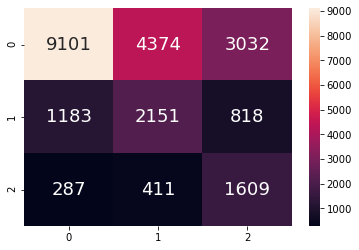

In [17]:
y_test_pred = brfc.predict(X_test)

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [18]:
print("Test Data")
print("Accuracy  :\t", brfc.score(X_test, y_test))
print()

cmTest = confusion_matrix(y_test, y_test_pred)
true_2_test=cmTest[0][0]
true_3_test=cmTest[1][1]
true_4_test=cmTest[2][2]
false_2_test=cmTest[0][1]+cmTest[0][2]
false_3_test=cmTest[1][0]+cmTest[1][2]
false_4_test=cmTest[2][0]+cmTest[2][1]

print("True 2 Test :\t", (true_2_test/(true_2_test + false_2_test)))
print("False 2 Test :\t", (false_2_test/(true_2_test + false_2_test)))
print()

print("True 3 Test :\t", (true_3_test/(true_3_test + false_3_test)))
print("False 3 Test :\t", (false_3_test/(true_3_test + false_3_test)))
print()

print("True 4 Test :\t", (true_4_test/(true_4_test + false_4_test)))
print("False 4 Test :\t", (false_4_test/(true_4_test + false_4_test)))
print()

Test Data
Accuracy  :	 0.5600017417051293

True 2 Test :	 0.5513418549706185
False 2 Test :	 0.44865814502938145

True 3 Test :	 0.5180635838150289
False 3 Test :	 0.4819364161849711

True 4 Test :	 0.6974425661031642
False 4 Test :	 0.3025574338968357



The test data did not give as good result as the train data did. Explanation might be similar to the case for ```BalancedBaggingClassifier```, which is larger data can be more efficient in performing the balancing.

One difference from the ```BalancedBaggingClassifier``` test data is that, for all levels of severity, the percentages of true are higher than the percentages of false. Whereas in the result of ```BalancedBaggingClassifier``` test data, prediction of severity level 3 is not as ideal.

All in all, the two models from ```imblearn``` ```ensemble``` library used here perform quite well compared to the previous models where we need to upsample the data, and also using cross validation to find the best models in order to reach a higher accuracy level.